<a href="https://colab.research.google.com/github/ahvblackwelltech/Mortality-in-the-Correctional-System/blob/main/Mortality_in_the_Correctional_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Check & Clean Data**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


correctional = pd.read_csv('/content/BOP-Individual.csv')

In [2]:
correctional.head()

,State,Year,Month,Death.Date,Facility,Death.Age,Sex,Race,First.Name,Last.Name,Circumstance.General,Circumstance.Specific,ID.No,UCLA.ID
0,Missouri,2015,January,2015-01-01,Springfield,65.0,Male,Black,NaN,NaN,Natural Causes,NaN,26727-083,2436.0
1,North Carolina,2015,January,2015-01-02,Butner,60.0,Male,White,NaN,NaN,Natural Causes,NaN,10476-059,2352.0
2,Texas,2015,January,2015-01-02,Carswell,54.0,Female,White,NaN,NaN,Natural Causes,NaN,58959-060,2354.0
3,New York,2015,January,2015-01-02,New York,50.0,Male,White,NaN,NaN,Natural Causes,NaN,69359-054,2409.0
4,Texas,2015,January,2015-01-03,Carswell,61.0,Female,Black,NaN,NaN,Natural Causes,NaN,18901-078,2354.0


In [3]:
correctional.describe()

,Year,Death.Age,UCLA.ID
count,2907.000000,2900.000000,2751.000000
mean,2018.012384,56.903103,2382.240640
std,2.061641,13.779491,35.182623
min,2015.000000,21.000000,2330.000000
25%,2016.000000,48.000000,2352.000000
50%,2018.000000,58.000000,2369.000000
75%,2020.000000,67.000000,2419.000000
max,2022.000000,97.000000,2453.000000


In [4]:
correctional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  2879 non-null   object 
 1   Year                   2907 non-null   int64  
 2   Month                  2907 non-null   object 
 3   Death.Date             2907 non-null   object 
 4   Facility               2897 non-null   object 
 5   Death.Age              2900 non-null   float64
 6   Sex                    2897 non-null   object 
 7   Race                   2897 non-null   object 
 8   First.Name             950 non-null    object 
 9   Last.Name              950 non-null    object 
 10  Circumstance.General   1952 non-null   object 
 11  Circumstance.Specific  676 non-null    object 
 12  ID.No                  2897 non-null   object 
 13  UCLA.ID                2751 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 318.1+

In [5]:
correctional.isnull().head()

,State,Year,Month,Death.Date,Facility,Death.Age,Sex,Race,First.Name,Last.Name,Circumstance.General,Circumstance.Specific,ID.No,UCLA.ID
0,False,False,False,False,False,False,False,False,True,True,False,True,False,False
1,False,False,False,False,False,False,False,False,True,True,False,True,False,False
2,False,False,False,False,False,False,False,False,True,True,False,True,False,False
3,False,False,False,False,False,False,False,False,True,True,False,True,False,False
4,False,False,False,False,False,False,False,False,True,True,False,True,False,False


In [6]:
correctional.isnull().sum()

State                      28
Year                        0
Month                       0
Death.Date                  0
Facility                   10
Death.Age                   7
Sex                        10
Race                       10
First.Name               1957
Last.Name                1957
Circumstance.General      955
Circumstance.Specific    2231
ID.No                      10
UCLA.ID                   156
dtype: int64

In [7]:
correctional2 = correctional.drop(['First.Name', 'Last.Name', 'Circumstance.Specific', 'ID.No', 'UCLA.ID'], axis=1)

In [8]:
correctional2

,State,Year,Month,Death.Date,Facility,Death.Age,Sex,Race,Circumstance.General
0,Missouri,2015,January,2015-01-01,Springfield,65.0,Male,Black,Natural Causes
1,North Carolina,2015,January,2015-01-02,Butner,60.0,Male,White,Natural Causes
2,Texas,2015,January,2015-01-02,Carswell,54.0,Female,White,Natural Causes
3,New York,2015,January,2015-01-02,New York,50.0,Male,White,Natural Causes
4,Texas,2015,January,2015-01-03,Carswell,61.0,Female,Black,Natural Causes
...,...,...,...,...,...,...,...,...,...
2902,West Virginia,2022,January,2022-01-12,Alderson,59.0,Female,White,NaN
2903,Kansas,2022,January,2022-01-13,Leavenworth,43.0,Male,Asian,NaN
2904,Florida,2022,January,2022-01-13,Coleman Medium,57.0,Male,Black,NaN
2905,North Carolina,2022,January,2022-01-14,Butner,47.0,Male,White,NaN


In [9]:
correctional2.isnull().sum()

State                    28
Year                      0
Month                     0
Death.Date                0
Facility                 10
Death.Age                 7
Sex                      10
Race                     10
Circumstance.General    955
dtype: int64

In [11]:
correctional3 = correctional2.replace(np.nan, '', regex=True)

In [12]:
correctional3

,State,Year,Month,Death.Date,Facility,Death.Age,Sex,Race,Circumstance.General
0,Missouri,2015,January,2015-01-01,Springfield,65.0,Male,Black,Natural Causes
1,North Carolina,2015,January,2015-01-02,Butner,60.0,Male,White,Natural Causes
2,Texas,2015,January,2015-01-02,Carswell,54.0,Female,White,Natural Causes
3,New York,2015,January,2015-01-02,New York,50.0,Male,White,Natural Causes
4,Texas,2015,January,2015-01-03,Carswell,61.0,Female,Black,Natural Causes
...,...,...,...,...,...,...,...,...,...
2902,West Virginia,2022,January,2022-01-12,Alderson,59.0,Female,White,
2903,Kansas,2022,January,2022-01-13,Leavenworth,43.0,Male,Asian,
2904,Florida,2022,January,2022-01-13,Coleman Medium,57.0,Male,Black,
2905,North Carolina,2022,January,2022-01-14,Butner,47.0,Male,White,


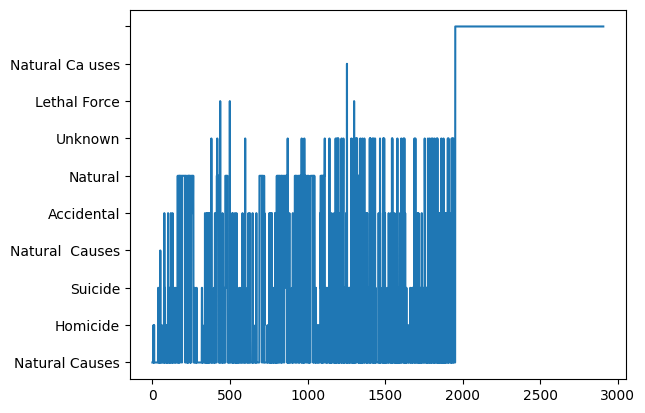

In [21]:
plt.plot(correctional3['Circumstance.General'])
plt.show()

In [22]:
correctional4 = correctional3.replace(to_replace=["Natural Ca uses", "Natural  Causes", "Natural"],
           value="Natural Causes")

In [23]:
correctional4


,State,Year,Month,Death.Date,Facility,Death.Age,Sex,Race,Circumstance.General
0,Missouri,2015,January,2015-01-01,Springfield,65.0,Male,Black,Natural Causes
1,North Carolina,2015,January,2015-01-02,Butner,60.0,Male,White,Natural Causes
2,Texas,2015,January,2015-01-02,Carswell,54.0,Female,White,Natural Causes
3,New York,2015,January,2015-01-02,New York,50.0,Male,White,Natural Causes
4,Texas,2015,January,2015-01-03,Carswell,61.0,Female,Black,Natural Causes
...,...,...,...,...,...,...,...,...,...
2902,West Virginia,2022,January,2022-01-12,Alderson,59.0,Female,White,
2903,Kansas,2022,January,2022-01-13,Leavenworth,43.0,Male,Asian,
2904,Florida,2022,January,2022-01-13,Coleman Medium,57.0,Male,Black,
2905,North Carolina,2022,January,2022-01-14,Butner,47.0,Male,White,


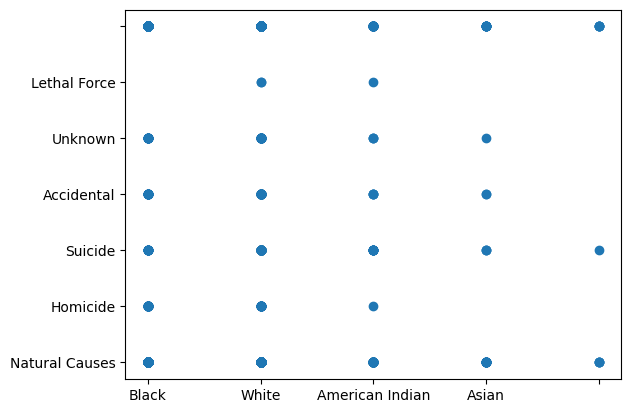

In [30]:
plt.scatter(correctional4['Race'], correctional4['Circumstance.General'])
plt.show()